In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Create a dataframe with dev.json
dev = pd.read_json('SPEGQL-dataset/dataset/dev.json')

In [4]:
# Show me the first 5 rows
dev.head()

,query,schemaId,question
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...
2,query { battle { name date } },battle_death,"List the name, date and result of each battle."
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...


In [5]:
# Do we have any missing values - no
dev.isnull().sum()


query       0
schemaId    0
question    0
dtype: int64

In [6]:
type(dev.iloc[0,2])

str

Average length of questions:  63.238267148014444
Minimum question length:  18
Maximum question length:  137
Median question length:  61.0


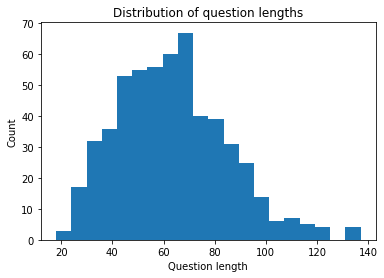

Short        140
Long         140
Medium       138
Very Long    135
Name: question_length_bucket, dtype: int64
Quartiles of question length:
 0.00     18.0
0.25     47.0
0.50     61.0
0.75     77.0
1.00    137.0
Name: question, dtype: float64

Count of questions in each bucket:
 Short        140
Long         140
Medium       138
Very Long    135
Name: question_length_bucket, dtype: int64


,query,schemaId,question,question_length,question_length_bucket
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium


In [7]:
# create a pandas Series of the question column
questions = dev['question']

# calculate the average length of the questions
avg_length = questions.str.len().mean()
min_length = questions.str.len().min()
max_length = questions.str.len().max()
median_length = questions.str.len().median()

# print out the average length of the questions
print("Average length of questions: ", avg_length)

# calculate and print out the minimum and maximum question lengths
print("Minimum question length: ", min_length)
print("Maximum question length: ", max_length)

# calculate and print out the median question length
print("Median question length: ", median_length)

# plot a histogram of the question lengths
plt.hist(questions.str.len(), bins=20)
plt.xlabel('Question length')
plt.ylabel('Count')
plt.title('Distribution of question lengths')
plt.show()

# calculate the quartiles of question length
quartiles = questions.str.len().quantile([0, 0.25, 0.5, 0.75, 1])

dev['question_length'] = questions.str.len()

# create a new column in the dataframe to represent the question length bucket
dev['question_length_bucket'] = pd.cut(questions.str.len(), bins=quartiles, labels=['Short', 'Medium', 'Long', 'Very Long'])

# print out the count of questions in each bucket
print(dev['question_length_bucket'].value_counts())

# create a new column in the dataframe to represent the question length bucket
dev['question_length_bucket'] = pd.cut(questions.str.len(), bins=quartiles, labels=['Short', 'Medium', 'Long', 'Very Long'])

# print out the quartiles and count of questions in each bucket
print("Quartiles of question length:\n", quartiles)
print("\nCount of questions in each bucket:\n", dev['question_length_bucket'].value_counts())

dev.head()


## Dataset

In [8]:
## Questions

from graphql import parse

query1 = "query { wrestler { hat outfit } }"
query2 = "query { wrestler { outfit hat } }"

def generate_ast(query: str):
    ast = parse(query)
    return ast

ast1 = generate_ast(query1)
ast2 = generate_ast(query2)

#Convert AST to dictionary to a tree

print(ast1.to_dict())
print("------------------------------------")
print(ast2.to_dict())


{'kind': 'document', 'definitions': [{'kind': 'operation_definition', 'name': None, 'directives': [], 'variable_definitions': [], 'selection_set': {'kind': 'selection_set', 'selections': [{'kind': 'field', 'directives': [], 'alias': None, 'name': {'kind': 'name', 'value': 'wrestler'}, 'arguments': [], 'selection_set': {'kind': 'selection_set', 'selections': [{'kind': 'field', 'directives': [], 'alias': None, 'name': {'kind': 'name', 'value': 'hat'}, 'arguments': [], 'selection_set': None}, {'kind': 'field', 'directives': [], 'alias': None, 'name': {'kind': 'name', 'value': 'outfit'}, 'arguments': [], 'selection_set': None}]}}]}, 'operation': 'query'}]}
------------------------------------
{'kind': 'document', 'definitions': [{'kind': 'operation_definition', 'name': None, 'directives': [], 'variable_definitions': [], 'selection_set': {'kind': 'selection_set', 'selections': [{'kind': 'field', 'directives': [], 'alias': None, 'name': {'kind': 'name', 'value': 'wrestler'}, 'arguments': [],

In [9]:
#Create a function that takes the dataset and check if there's duplicate queries
def check_duplicate_queries(df):
    queries = df['query'].tolist()
    return len(queries) == len(set(queries))

check_duplicate_queries(dev)

False

Mean nesting level: 3.148014440433213
Median nesting level: 3.0
Minimum nesting level: 2
Maximum nesting level: 6


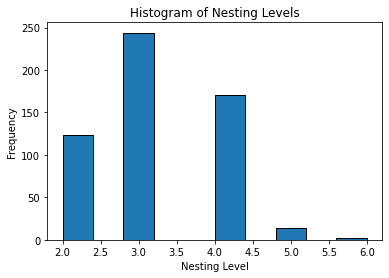

Nesting level 2 123
Nesting level 3 244
Nesting level 4 171
Nesting level 5 14
Nesting level 6 2


,query,schemaId,question,question_length,question_length_bucket,nesting_level
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short,3
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long,2
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short,2
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium,4
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium,4


In [10]:
import re

# Function to calculate the nesting level of a query
def nesting_level(query):
    query = re.sub(r'\s+', '', query)  # Remove whitespace
    max_nesting = 0
    current_nesting = 0

    for char in query:
        if char == '{':
            current_nesting += 1
            max_nesting = max(max_nesting, current_nesting)
        elif char == '}':
            current_nesting -= 1

    return max_nesting

# Calculate the nesting level for each query and add it as a new column
dev['nesting_level'] = dev['query'].apply(nesting_level)
# create a new column in the dataframe to represent the nesting level bucket

# calculate the mean, median, min, and max of nesting levels
mean_nesting = dev['nesting_level'].mean()
median_nesting = dev['nesting_level'].median()
min_nesting = dev['nesting_level'].min()
max_nesting = dev['nesting_level'].max()

print(f"Mean nesting level: {mean_nesting}")
print(f"Median nesting level: {median_nesting}")
print(f"Minimum nesting level: {min_nesting}")
print(f"Maximum nesting level: {max_nesting}")

# plot a histogram of the nesting levels
plt.hist(dev['nesting_level'], edgecolor='black')
plt.xlabel('Nesting Level')
plt.ylabel('Frequency')
plt.title('Histogram of Nesting Levels')
plt.show()

dev[dev['nesting_level'] == 2].shape[0]
print("Nesting level 2 " + str(dev[dev['nesting_level'] == 2].shape[0]))
print("Nesting level 3 " + str(dev[dev['nesting_level'] == 3].shape[0]))
print("Nesting level 4 " + str(dev[dev['nesting_level'] == 4].shape[0]))
print("Nesting level 5 " + str(dev[dev['nesting_level'] == 5].shape[0]))
print("Nesting level 6 " + str(dev[dev['nesting_level'] == 6].shape[0]))

dev.head()


0
7
2.3285198555956677
3.0


,query,schemaId,question,question_length,question_length_bucket,nesting_level,num_args
0,query { ship_aggregate ( where : { disposition...,battle_death,How many ships ended up being 'Captured'?,41,Short,3,3
1,query { ship ( order_by : { name : desc } ) { ...,battle_death,List the name and tonnage ordered by in descen...,83,Very Long,2,2
2,query { battle { name date } },battle_death,"List the name, date and result of each battle.",46,Short,2,0
3,query { death_aggregate { aggregate { max { ki...,battle_death,What is maximum and minimum death toll caused ...,56,Medium,4,0
4,query { death_aggregate { aggregate { avg { in...,battle_death,What is the average number of injuries caused ...,56,Medium,4,0


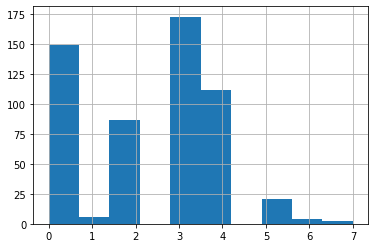

In [11]:
import re
import pandas as pd

# Define the regular expression to match argument names in a GraphQL query
arg_regex = r'\b(\w+)\s*:[^{]+'

# Define a function to count the number of arguments in a query
def count_query_arguments(query):
    match_iter = re.finditer(arg_regex, query)
    arg_names = set(match.group(1) for match in match_iter)
    num_args = len(arg_names)
    return num_args

# dev = pd.read_json('dataset/dev.json')
dev['num_args'] = dev['query'].apply(count_query_arguments)

dev['num_args'].hist()

print(dev['num_args'].min())
print(dev['num_args'].max())

print(dev['num_args'].mean())
print(dev['num_args'].median())


dev.head()


In [40]:
# x = 'query { user(id: 123) { name email } }'

# count_query_arguments(x)

# y = "query { user(id: 123) { name email posts(status: PUBLISHED, orderBy: {field: CREATED_AT, direction: DESC}, limit: 10) { title body comments(limit: 5, orderBy: {field: CREATED_AT, direction: ASC}) { author { name } content } } followers(limit: 20) { name email } } }"

query = '''
  query GetBook($bookId: ID!, $authorName: String!, $includeReviews: Boolean) {
    book(id: $bookId) {
      title
      author(name: $authorName) {
        firstName
        lastName
      }
      reviews @include(if: $includeReviews) {
        rating
        text
      }
    }
  }
'''

count_query_arguments(query) # Something is wrong here - there's more than 3 arguments in this one


4

### Schemas

I wish to know how many schemas we have. 

I want to create a dataframe of all of my schemas. In the first column I want to know the id of the schema
In the second row I want to know the length of the schema

Create a dataframe with the columns schemaId, schema_complexity and schema_complexity. 
schema_complexity and schema lenght should be blank for now. 

I have a folder called Schemas wherein there is larger number of schemas. 
To populate schemaId I want you to loop over all the folders in the Schemas folder, and use the folder names as the schemaId in the dataframe

For every schema folder in the Schemas folder there's a file called schemas.json. I want you to count how long this file is and populate the scehma length wtih this length

In [12]:
import os
import pandas as pd

# Create an empty DataFrame with the specified columns
data = {'schemaId': [], 'schema_complexity': [], 'schema_complexity': []}
df = pd.DataFrame(data)

# Loop over all folders within the "Schemas" folder
schemas_folder = 'SPEGQL-dataset/Schemas'
schema_folders = sorted(os.listdir(schemas_folder), key=lambda x: os.path.getmtime(os.path.join(schemas_folder, x)))

for schema_folder in schema_folders:
    if os.path.isdir(os.path.join(schemas_folder, schema_folder)):
        # Read the schema.json file and count the number of lines
        with open(os.path.join(schemas_folder, schema_folder, 'schema.json'), 'r') as schema_file:
            schema_length = sum(1 for line in schema_file)

        # Append the schemaId and schema_complexity to the DataFrame
        new_row = pd.DataFrame({'schemaId': [schema_folder], 'schema_complexity': [schema_length]})
        df = pd.concat([df, new_row], ignore_index=True)

print(df)


                        schemaId  schema_complexity
0                       academic            38065.0
1                     activity_1            13960.0
2                       aircraft            15346.0
3                      allergy_1             7936.0
4              apartment_rentals            18335.0
..                           ...                ...
161                     soccer_1            31878.0
162                      store_1            33410.0
163           student_assessment            24659.0
164  tracking_share_transactions            17574.0
165        university_basketball             7621.0

[166 rows x 2 columns]


In [13]:
# Find the schema with the maximum length
max_length = df['schema_complexity'].max()
max_length_schema = df[df['schema_complexity'] == max_length]['schemaId'].values[0]

print(f"Schema with maximum length: {max_length_schema} ({max_length} lines)")

# Find the schema with the minimum length
min_length = df['schema_complexity'].min()
min_length_schema = df[df['schema_complexity'] == min_length]['schemaId'].values[0]

print(f"Schema with minimum length: {min_length_schema} ({min_length} lines)")


Schema with maximum length: baseball_1 (116912.0 lines)
Schema with minimum length: student_1 (5744.0 lines)


In [14]:
def analyze_schema_complexity(schema_json):
    types_count = 0
    fields_count = 0
    input_objects_count = 0
    relationships_count = 0
    arguments_count = 0

    for type_ in schema_json["__schema"]["types"]:
        types_count += 1

        if type_["kind"] == "INPUT_OBJECT":
            input_objects_count += 1

        if "fields" in type_ and type_["fields"] is not None:
            for field in type_["fields"]:
                fields_count += 1

                if "args" in field:
                    arguments_count += len(field["args"])
                    relationships_count += 1

    complexity_score = (
        (types_count * 1)
        + (fields_count * 2)
        + (input_objects_count * 3)
        + (relationships_count * 4)
        + (arguments_count * 5)
    )

    return complexity_score


# Load your GraphQL schema JSON file
import json

with open("SPEGQL-dataset/Schemas/activity_1/schema.json", "r") as file:
    schema_json = json.load(file)

complexity_score = analyze_schema_complexity(schema_json)
print("Complexity score:", complexity_score)


Complexity score: 3470


In [15]:
## Test 

# Sample GraphQL schema in JSON format
sample_schema = {
    "__schema": {
        "types": [
            {
                "kind": "OBJECT",
                "name": "query_root",
                "fields": [
                    {
                        "name": "author",
                        "args": [
                            {"name": "limit"},
                            {"name": "offset"},
                            {"name": "order_by"},
                            {"name": "where"},
                        ],
                    },
                    {
                        "name": "author_aggregate",
                        "args": [
                            {"name": "distinct_on"},
                            {"name": "limit"},
                            {"name": "offset"},
                            {"name": "order_by"},
                        ],
                    },
                ],
            },
            {
                "kind": "OBJECT",
                "name": "author",
                "fields": [
                    {"name": "id"},
                    {"name": "name"},
                    {"name": "birthdate"},
                ],
            },
            {
                "kind": "INPUT_OBJECT",
                "name": "author_bool_exp",
            },
        ],
    },
}

# Run the analyze_schema_complexity function with the sample schema
complexity_score = analyze_schema_complexity(sample_schema)
print("Complexity score:", complexity_score)

Complexity score: 64


In [16]:
## Call the function on all schemas and add the complexity score to the DataFrame
for schema_folder in schema_folders:
    if os.path.isdir(os.path.join(schemas_folder, schema_folder)):
        with open(os.path.join(schemas_folder, schema_folder, 'schema.json'), 'r') as schema_file:
            schema_json = json.load(schema_file)
            complexity_score = analyze_schema_complexity(schema_json)
            df.loc[df['schemaId'] == schema_folder, 'schema_complexity'] = complexity_score



Schema with maximum complexity: baseball_1 (27875.0)
Schema with minimum complexity: student_1 (1327.0)


<AxesSubplot:xlabel='schema_complexity', ylabel='schema_complexity'>

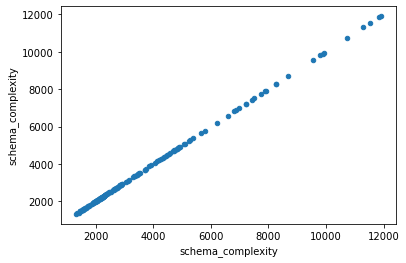

In [17]:
#It's kinda obvious that schema_complexity is correlated with schema_complexity, since a way to increase the complexity is to add more types, fields, relationships, etc. to the schema.

## Print the max complexity score
max_complexity = df['schema_complexity'].max()
max_complexity_schema = df[df['schema_complexity'] == max_complexity]['schemaId'].values[0]
print(f"Schema with maximum complexity: {max_complexity_schema} ({max_complexity})")

## What is the min complexity score?
min_complexity = df['schema_complexity'].min()
min_complexity_schema = df[df['schema_complexity'] == min_complexity]['schemaId'].values[0]
print(f"Schema with minimum complexity: {min_complexity_schema} ({min_complexity})")

## describe the complexity score
df['schema_complexity'].describe()

## Remove outliers
df = df[df['schema_complexity'] < 15000]

#What is the correlation between the schema_complexity and the schema_complexity?
df.plot.scatter(x='schema_complexity', y='schema_complexity')

In [18]:
## What is the correlation value between the schema_complexity and the schema_complexity?
df['schema_complexity'].corr(df['schema_complexity'])




1.0

In [19]:
#Combine dev and df on schemaId

dev_df = dev.merge(df, on='schemaId')

print(dev_df.head())

#Covert the schema_complexity to int
dev_df['schema_complexity'] = dev_df['schema_complexity'].astype(int)

## Export the DataFrame to a CSV file
dev_df.to_csv('dev_df.csv', index=False)

                                               query      schemaId  \
0  query { ship_aggregate ( where : { disposition...  battle_death   
1  query { ship ( order_by : { name : desc } ) { ...  battle_death   
2                     query { battle { name date } }  battle_death   
3  query { death_aggregate { aggregate { max { ki...  battle_death   
4  query { death_aggregate { aggregate { avg { in...  battle_death   

                                            question  question_length  \
0          How many ships ended up being 'Captured'?               41   
1  List the name and tonnage ordered by in descen...               83   
2     List the name, date and result of each battle.               46   
3  What is maximum and minimum death toll caused ...               56   
4  What is the average number of injuries caused ...               56   

  question_length_bucket  nesting_level  num_args  schema_complexity  
0                  Short              3         3             2339.0 

In [36]:
## create a dataframe called dev_def_with_results from the csv file dev_def_with_results
dev_df_with_results = pd.read_csv('dev_df_with_results.csv')

dev_df_with_results.head()

#How many rows have exact match of 1?
print(dev_df_with_results['exact_match'].value_counts(normalize=True))

#How how many rows have semantic match of 1?
print(dev_df_with_results['semantic_match'].value_counts(normalize=True))

#Out of all the rows what proportion of the rows have a semantic match of 1?

#print(dev_df_with_results['semantic_match'].value_counts(normalize=True))

#Calculate the accuracy of the semantic match
dev_df_with_results['semantic_match_accuracy'] = dev_df_with_results['semantic_match'] == dev_df_with_results['semantic_match']

#Calculate the accuracy of the exact match

dev_df_with_results['exact_match_accuracy'] = dev_df_with_results['exact_match'] == dev_df_with_results['exact_match']

0    0.648014
1    0.351986
Name: exact_match, dtype: float64
1    0.644404
0    0.355596
Name: semantic_match, dtype: float64
